In [4]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

     |████████████████████████████████| 125 kB 5.0 MB/s 


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
!pip install pandas-datareader

In [9]:
import pandas as pd
import numpy as np

import pandas_datareader as pdr
import matplotlib.pyplot as plt

# history bitcoin
# https://finance.yahoo.com/quote/BTC-USD/history/


#data_btc = pdr.get_data_yahoo('BTC', start='2012-1-1') 
#data_btc = pdr.yahoo.daily.YahooDailyReader(symbols='BTC',start='11/13/2016')





In [11]:
data_btc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/cryptcoin/BTC-USD.csv')
#data_btc['Timestamp'] = pd.to_datetime(data_btc['Date'])
data_btc = data_btc.set_index("Date")

In [12]:
data_btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200.0
2014-11-13,427.273010,457.092987,401.122986,420.734985,420.734985,58945000.0
2014-11-14,418.416992,419.252014,384.789001,397.817993,397.817993,29589200.0
2014-11-15,399.649994,405.528015,371.007996,376.132996,376.132996,15727500.0
2014-11-16,374.730011,390.799011,374.601990,387.881989,387.881989,11905600.0


In [13]:
data_btc.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

## Using Moving Crossover Strategy 

In [14]:
data_btc['2_SMA'] = data_btc['Close'].rolling(window=2).mean()
data_btc['2_SMA']

Date
2014-11-12             NaN
2014-11-13      422.147995
2014-11-14      409.276489
2014-11-15      386.975494
2014-11-16      382.007492
                  ...     
2021-11-08    65446.908203
2021-11-09    67269.328125
2021-11-10    65983.529297
2021-11-11    64972.595703
2021-11-12    64396.898438
Name: 2_SMA, Length: 2558, dtype: float64

In [15]:
data_btc['5_SMA'] = data_btc['Close'].rolling(window=5).mean()
data_btc['5_SMA']

Date
2014-11-12             NaN
2014-11-13             NaN
2014-11-14             NaN
2014-11-15             NaN
2014-11-16      401.225794
                  ...     
2021-11-08    62999.840625
2021-11-09    64103.760156
2021-11-10    64877.671094
2021-11-11    65562.167188
2021-11-12    65665.536719
Name: 5_SMA, Length: 2558, dtype: float64

In [16]:
data_btc = data_btc[data_btc['5_SMA'].notna()]
data_btc.head()

,Open,High,Low,Close,Adj Close,Volume,2_SMA,5_SMA
Date,,,,,,,,
2014-11-16,374.730011,390.799011,374.601990,387.881989,387.881989,11905600.0,382.007492,401.225794
2014-11-17,388.348999,410.199005,377.502014,387.407990,387.407990,41518800.0,387.644989,393.995191
2014-11-18,387.785004,392.402008,371.117004,375.197998,375.197998,32222500.0,381.302994,384.887793
2014-11-19,373.895996,386.480988,373.895996,380.554993,380.554993,18931800.0,377.876495,381.435193
2014-11-20,380.307007,382.024994,356.781006,357.839996,357.839996,25233200.0,369.197494,377.776593


In [17]:
Trade_Buy=[]
Trade_Sell=[]
for i in range(data_btc.shape[0]-1):
    if ((data_btc['2_SMA'].values[i] < data_btc['5_SMA'].values[i]) & (data_btc['2_SMA'].values[i+1] > data_btc['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Buy.".format(row=data_btc.index[i]))
        Trade_Buy.append(i)
    elif ((data_btc['2_SMA'].values[i] > data_btc['5_SMA'].values[i]) & (data_btc['2_SMA'].values[i+1] < data_btc['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Sell.".format(row=data_btc.index[i]))
        Trade_Sell.append(i)

Trade Call for 2014-11-23 is Buy.
Trade Call for 2014-11-26 is Sell.
Trade Call for 2014-11-28 is Buy.
Trade Call for 2014-12-03 is Sell.
Trade Call for 2014-12-05 is Buy.
Trade Call for 2014-12-07 is Sell.
Trade Call for 2014-12-12 is Buy.
Trade Call for 2014-12-13 is Sell.
Trade Call for 2014-12-19 is Buy.
Trade Call for 2014-12-24 is Sell.
Trade Call for 2014-12-30 is Buy.
Trade Call for 2015-01-02 is Sell.
Trade Call for 2015-01-06 is Buy.
Trade Call for 2015-01-09 is Sell.
Trade Call for 2015-01-17 is Buy.
Trade Call for 2015-01-27 is Sell.
Trade Call for 2015-02-01 is Buy.
Trade Call for 2015-02-03 is Sell.
Trade Call for 2015-02-06 is Buy.
Trade Call for 2015-02-08 is Sell.
Trade Call for 2015-02-12 is Buy.
Trade Call for 2015-02-15 is Sell.
Trade Call for 2015-02-18 is Buy.
Trade Call for 2015-02-22 is Sell.
Trade Call for 2015-02-26 is Buy.
Trade Call for 2015-03-05 is Sell.
Trade Call for 2015-03-07 is Buy.
Trade Call for 2015-03-12 is Sell.
Trade Call for 2015-03-15 is Buy.


In [18]:
(Trade_Buy)

[7,
 12,
 19,
 26,
 33,
 44,
 51,
 62,
 77,
 82,
 88,
 94,
 102,
 111,
 119,
 125,
 131,
 136,
 151,
 155,
 162,
 172,
 185,
 193,
 203,
 218,
 222,
 230,
 246,
 260,
 268,
 277,
 282,
 292,
 305,
 310,
 327,
 337,
 362,
 365,
 374,
 383,
 402,
 408,
 416,
 428,
 434,
 444,
 450,
 466,
 477,
 484,
 491,
 502,
 511,
 519,
 531,
 534,
 536,
 543,
 553,
 572,
 586,
 591,
 603,
 616,
 620,
 627,
 633,
 639,
 652,
 656,
 668,
 672,
 677,
 689,
 705,
 721,
 729,
 736,
 744,
 752,
 790,
 802,
 820,
 846,
 855,
 861,
 882,
 889,
 909,
 912,
 924,
 943,
 954,
 959,
 974,
 984,
 991,
 1010,
 1024,
 1035,
 1042,
 1054,
 1068,
 1074,
 1087,
 1093,
 1104,
 1121,
 1124,
 1135,
 1142,
 1160,
 1165,
 1179,
 1184,
 1198,
 1211,
 1218,
 1233,
 1238,
 1242,
 1249,
 1259,
 1263,
 1274,
 1280,
 1290,
 1297,
 1308,
 1317,
 1321,
 1336,
 1350,
 1368,
 1374,
 1384,
 1395,
 1403,
 1410,
 1418,
 1428,
 1435,
 1438,
 1441,
 1446,
 1472,
 1484,
 1491,
 1503,
 1507,
 1511,
 1520,
 1530,
 1537,
 1544,
 1553,
 1564,

In [19]:
Trade_Sell

[10,
 17,
 21,
 27,
 38,
 47,
 54,
 72,
 79,
 84,
 91,
 98,
 109,
 116,
 121,
 127,
 133,
 141,
 152,
 159,
 170,
 176,
 190,
 194,
 215,
 219,
 228,
 239,
 255,
 262,
 269,
 279,
 288,
 297,
 308,
 326,
 336,
 354,
 363,
 368,
 380,
 398,
 404,
 413,
 420,
 432,
 436,
 447,
 463,
 471,
 482,
 487,
 498,
 508,
 518,
 527,
 532,
 535,
 540,
 547,
 570,
 581,
 588,
 595,
 611,
 617,
 622,
 632,
 634,
 646,
 654,
 664,
 669,
 674,
 687,
 701,
 718,
 726,
 734,
 739,
 749,
 781,
 799,
 815,
 841,
 850,
 857,
 878,
 888,
 908,
 910,
 921,
 938,
 950,
 956,
 963,
 980,
 989,
 1005,
 1021,
 1027,
 1039,
 1052,
 1065,
 1072,
 1085,
 1089,
 1103,
 1119,
 1123,
 1128,
 1138,
 1148,
 1162,
 1170,
 1183,
 1193,
 1205,
 1212,
 1222,
 1235,
 1240,
 1247,
 1256,
 1261,
 1267,
 1276,
 1282,
 1296,
 1300,
 1313,
 1318,
 1331,
 1348,
 1352,
 1372,
 1383,
 1388,
 1400,
 1407,
 1414,
 1423,
 1432,
 1437,
 1439,
 1442,
 1453,
 1475,
 1485,
 1499,
 1506,
 1510,
 1515,
 1526,
 1532,
 1540,
 1548,
 1560,
 156

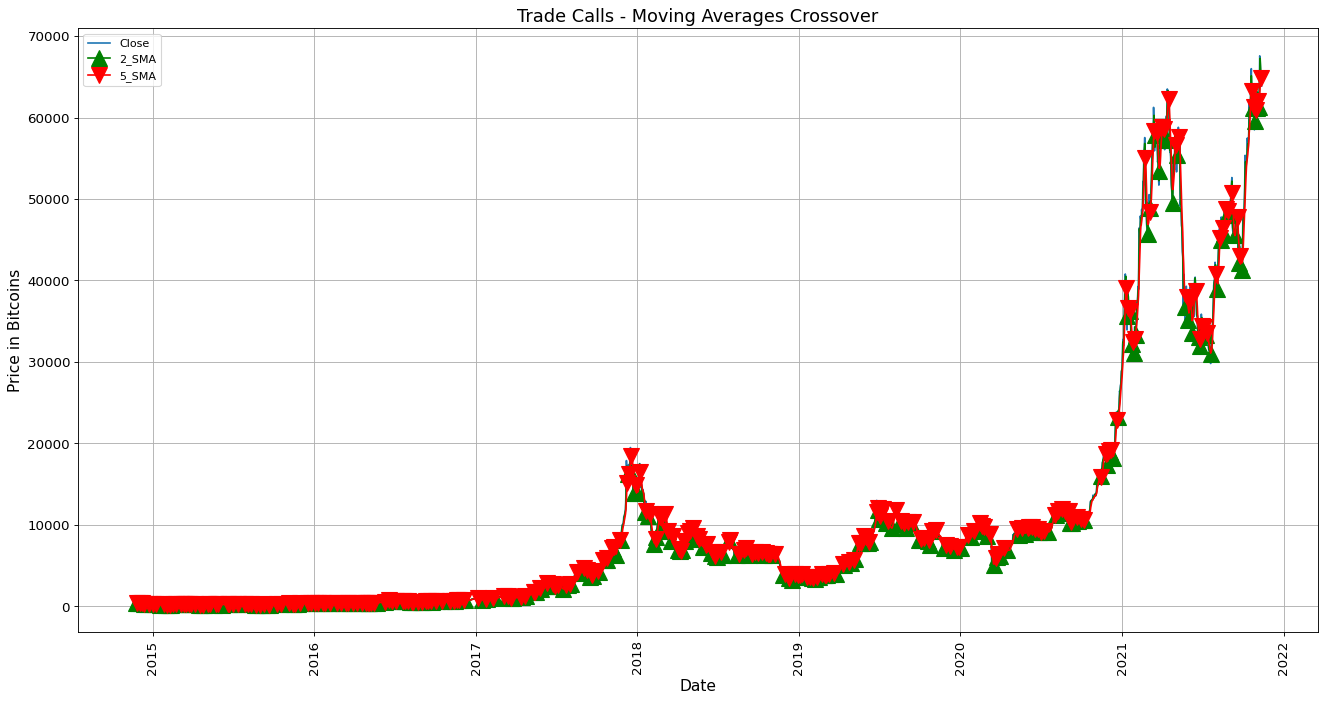

In [104]:
data_btc.index =  pd.to_datetime(data_btc.index, format='%Y-%m-%d')

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_btc.index, data_btc['Close'])
plt.plot(data_btc.index, data_btc['2_SMA'],'-^', markevery=Trade_Buy, ms=15, color='green')
plt.plot(data_btc.index, data_btc['5_SMA'],'-v', markevery=Trade_Sell, ms=15, color='red')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Bitcoins', fontsize = 14)
plt.xticks(rotation='vertical',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - Moving Averages Crossover', fontsize = 16)
plt.legend(['Close','2_SMA','5_SMA'])
plt.grid()
plt.show() 

In [21]:
from pandas.tseries.offsets import BDay

In [22]:
"""
Market Open and Close CryptCurruncies Hour
crypto-market-open-and-close-time
https://liarsliarsliars.com/crypto-market-open-and-close-time/
link: https://www.finder.com/crypto-markets-trading-hours-converter
"""
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=8,minute=0) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=16,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=16,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=8,minute=0)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

# Load Tweet Dataset

In [23]:
import random
#https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets

p = 0.005

#partial tweets
#tweet_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/cryptcoin/Bitcoin_tweets.csv', skiprows=lambda i: i>0 and random.random() > p, lineterminator='\n' )
# Full Tweets
tweet_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/cryptcoin/en_tweet.csv')

tweet_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,6,7,8,9,10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,language
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,en
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,en
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,en
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,en
4,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,en


In [24]:
 tweet_df = tweet_df.dropna(subset=['date'])

In [25]:
indexes2Drop = tweet_df[tweet_df['date'].str.contains("bitcoin|Bitcoin|ETH|btc|BTC")].index
tweet_df.drop(indexes2Drop,inplace=True)

In [26]:
%%time
tweet_df["trading_time"] = tweet_df["date"].apply(get_trade_open)
tweet_df["trading_time"].head()

CPU times: user 19min 57s, sys: 3.93 s, total: 20min 1s
Wall time: 20min 3s


In [27]:
tweet_df = tweet_df[pd.notnull(tweet_df['trading_time'])]
tweet_df.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,language,trading_time
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,en,2021-02-11 08:00:00
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,en,2021-02-11 08:00:00
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,en,2021-02-11 08:00:00
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,en,2021-02-11 08:00:00
4,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,en,2021-02-11 08:00:00


In [28]:
tweet_df['Date'] = pd.to_datetime(pd.to_datetime(tweet_df['trading_time']).dt.date)
tweet_df[ ['date','trading_time', 'Date'] ].head()

,date,trading_time,Date
0,2021-02-10 23:59:04,2021-02-11 08:00:00,2021-02-11
1,2021-02-10 23:58:48,2021-02-11 08:00:00,2021-02-11
2,2021-02-10 23:54:48,2021-02-11 08:00:00,2021-02-11
3,2021-02-10 23:54:33,2021-02-11 08:00:00,2021-02-11
4,2021-02-10 23:54:06,2021-02-11 08:00:00,2021-02-11


# Get Compound Vader Scoring from Tweet Text Sentence

In [29]:
%%time
cs = []
#calculate polarity score
for row in range(len(tweet_df)):
    cs.append(analyzer.polarity_scores(tweet_df['text'].iloc[row])['compound'])

tweet_df['compound_vader_score'] = cs
tweet_df = tweet_df[(tweet_df[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)



CPU times: user 7min 24s, sys: 1.53 s, total: 7min 25s
Wall time: 7min 26s


In [30]:
tweet_df.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,language,trading_time,Date,compound_vader_score
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.2960
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,en,2021-02-11 08:00:00,2021-02-11,0.4939
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.5719
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,en,2021-02-11 08:00:00,2021-02-11,0.3164
4,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.4019


In [31]:
%%time
unique_dates = tweet_df['Date'].unique()
grouped_dates = tweet_df.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_vader_score"].max() > 0:
        max_cs.append(data["compound_vader_score"].max())
    elif data["compound_vader_score"].max() < 0:
        max_cs.append(0)
    
    if data["compound_vader_score"].min() < 0:
        min_cs.append(data["compound_vader_score"].min())
    elif data["compound_vader_score"].min() > 0:
        min_cs.append(0)

CPU times: user 529 ms, sys: 16 ms, total: 545 ms
Wall time: 545 ms


In [32]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

# Summing and calculating final VADER scores

In [33]:
%%time
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores



CPU times: user 2.97 ms, sys: 0 ns, total: 2.97 ms
Wall time: 2.98 ms


In [34]:
extreme_scores_df.head()

,Date,max_scores,min_scores,final_scores
0,2021-02-08,0.9609,-0.9577,0.0032
1,2021-02-09,0.9678,-0.8934,0.0744
2,2021-02-10,0.9678,-0.8807,0.0871
3,2021-02-11,0.9484,-0.8016,0.1468
4,2021-02-15,0.9536,-0.9157,0.0379


# Using final compound VADER scores with  threshold to generate trade calls

In [71]:
# VADER trade calls - with threshold
%%time
vader_Buy=[]
vader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.002:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.002:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

Trade Call for 2021-02-08 is Buy.
Trade Call for 2021-02-09 is Buy.
Trade Call for 2021-02-10 is Buy.
Trade Call for 2021-02-11 is Buy.
Trade Call for 2021-02-15 is Buy.
Trade Call for 2021-02-16 is Buy.
Trade Call for 2021-02-19 is Buy.
Trade Call for 2021-02-22 is Buy.
Trade Call for 2021-02-23 is Buy.
Trade Call for 2021-03-01 is Sell.
Trade Call for 2021-03-12 is Buy.
Trade Call for 2021-03-15 is Buy.
Trade Call for 2021-04-06 is Buy.
Trade Call for 2021-04-07 is Buy.
Trade Call for 2021-04-08 is Buy.
Trade Call for 2021-04-09 is Buy.
Trade Call for 2021-04-12 is Buy.
Trade Call for 2021-04-13 is Buy.
Trade Call for 2021-04-19 is Buy.
Trade Call for 2021-04-20 is Buy.
Trade Call for 2021-04-21 is Buy.
Trade Call for 2021-04-22 is Buy.
Trade Call for 2021-04-23 is Buy.
Trade Call for 2021-04-26 is Buy.
Trade Call for 2021-05-26 is Buy.
Trade Call for 2021-05-27 is Buy.
Trade Call for 2021-05-28 is Buy.
Trade Call for 2021-05-31 is Buy.
Trade Call for 2021-06-21 is Buy.
Trade Call fo

## Check Dataset instances is vader  trade call scoring in Close Hour 

In [72]:
vader_buy = []
for i in range(data_btc.shape[0]):
    if data_btc.index[i] in vader_Buy:
        vader_buy.append(i)
        
vader_sell = []
for i in range(data_btc.shape[0]):
    if data_btc.index[i] in vader_Sell:
        vader_sell.append(i)
        


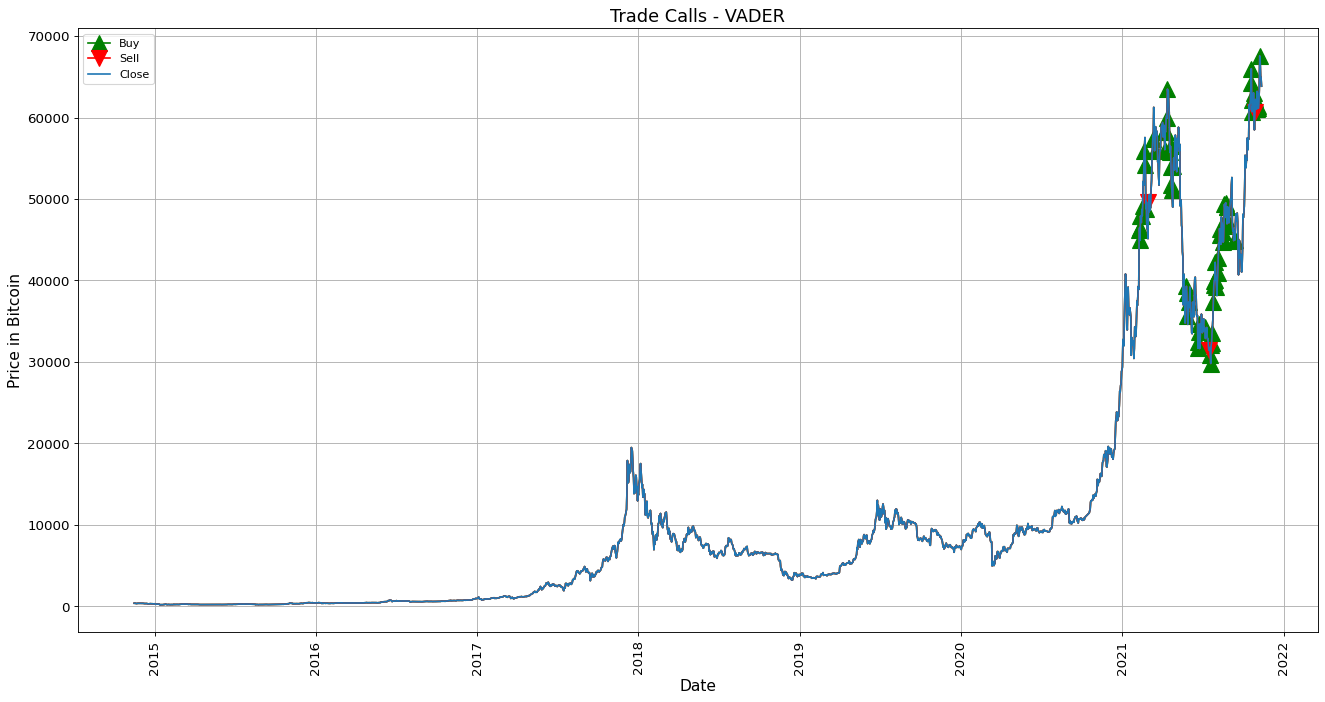

In [73]:
data_btc.index =  pd.to_datetime(data_btc.index, format='%Y-%m-%d')


plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_btc.index, data_btc['Close'],'-^', markevery=vader_buy, ms=15, color='green')
plt.plot(data_btc.index, data_btc['Close'],'-v', markevery=vader_sell, ms=15, color='red')
plt.plot(data_btc.index, data_btc['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Bitcoin', fontsize = 14)
plt.xticks(rotation='vertical',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
#plt.xticks(data_btc[::20],  rotation='vertical')
#plt.margins(0.5)
plt.grid()
plt.show() 

# Merging Trade Signals with SMA(2) at higher priority and VADER for refining


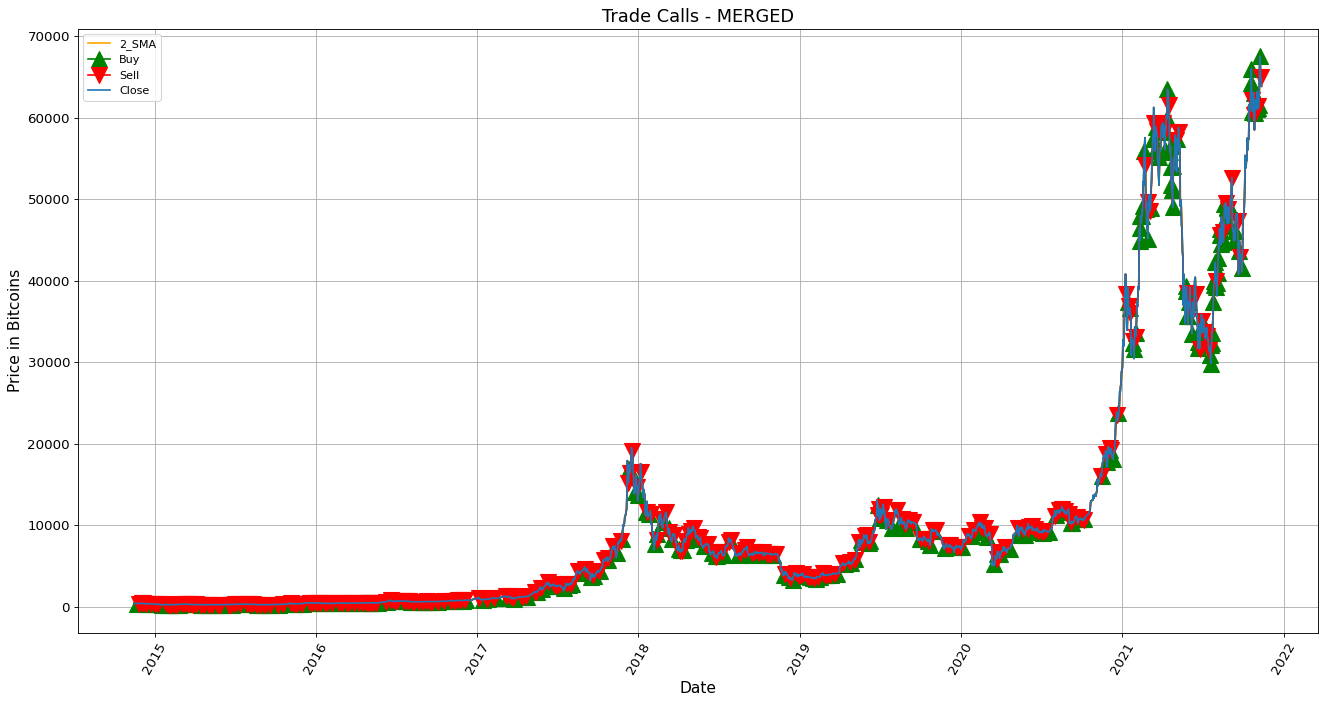

In [69]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))


plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_btc.index, data_btc['2_SMA'], color='orange')
#plt.plot(data_btc.index, data_btc['5_SMA'], color='orange')
plt.plot(data_btc.index, data_btc['Close'],'-^', markevery=final_buy, ms=15, color='green')
plt.plot(data_btc.index, data_btc['Close'],'-v', markevery=final_sell, ms=15, color='red')
plt.plot(data_btc.index, data_btc['Close'])

plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Bitcoins', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 

# Merging Trade Signals with SMA(5) at higher priority and VADER for refining


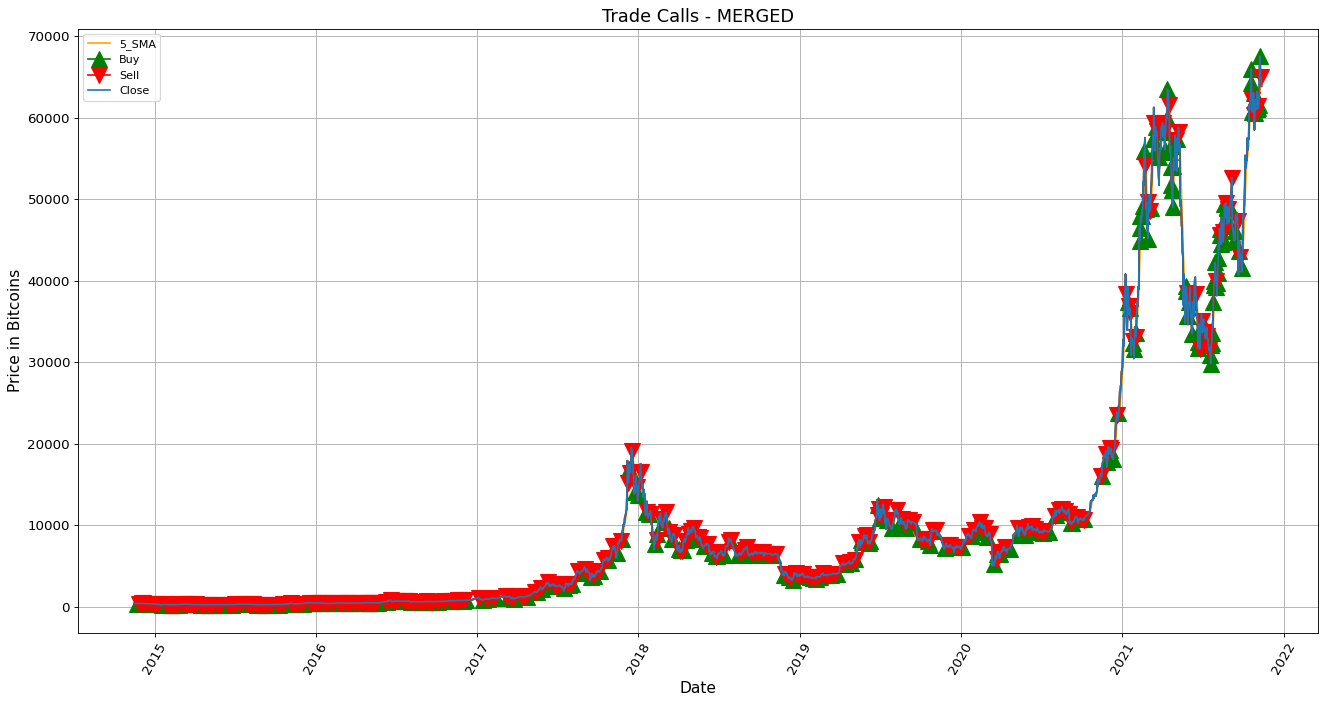

In [70]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_btc.index, data_btc['5_SMA'], color='orange')
#plt.plot(data_btc.index, data_btc['5_SMA'], color='orange')
plt.plot(data_btc.index, data_btc['Close'],'-^', markevery=final_buy, ms=15, color='green')
plt.plot(data_btc.index, data_btc['Close'],'-v', markevery=final_sell, ms=15, color='red')
plt.plot(data_btc.index, data_btc['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Bitcoins', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 

# VaderSentimetn - SentimentIntensityAnalyzer

In [74]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

## Using Moving Crossover Strategy 

In [75]:
data_btc['2_SMA'] = data_btc['Close'].rolling(window=2).mean()
data_btc['2_SMA']

Date
2014-11-16             NaN
2014-11-17      387.644990
2014-11-18      381.302994
2014-11-19      377.876496
2014-11-20      369.197495
                  ...     
2021-11-08    65446.908203
2021-11-09    67269.328125
2021-11-10    65983.529297
2021-11-11    64972.595703
2021-11-12    64396.898438
Name: 2_SMA, Length: 2540, dtype: float64

In [76]:
data_btc['5_SMA'] = data_btc['Close'].rolling(window=5).mean()
data_btc['5_SMA']

Date
2014-11-16             NaN
2014-11-17             NaN
2014-11-18             NaN
2014-11-19             NaN
2014-11-20      377.776593
                  ...     
2021-11-08    62999.840625
2021-11-09    64103.760156
2021-11-10    64877.671094
2021-11-11    65562.167188
2021-11-12    65665.536719
Name: 5_SMA, Length: 2540, dtype: float64

In [77]:
data_btc = data_btc[data_btc['5_SMA'].notna()]
data_btc

,Open,High,Low,Close,Adj Close,Volume,2_SMA,5_SMA
Date,,,,,,,,
2014-11-20,380.307007,382.024994,356.781006,357.839996,357.839996,2.523320e+07,369.197495,377.776593
2014-11-21,357.878998,357.878998,344.112000,350.847992,350.847992,2.985010e+07,354.343994,370.369794
2014-11-22,351.604004,364.841003,350.877991,352.920013,352.920013,1.527300e+07,351.884002,363.472198
2014-11-23,353.174988,370.845001,353.174988,367.572998,367.572998,1.515160e+07,360.246506,361.947198
2014-11-24,366.947998,387.209015,366.669006,376.901001,376.901001,3.093010e+07,372.237000,361.216400
...,...,...,...,...,...,...,...,...
2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,4.112561e+10,65446.908203,62999.840625
2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,4.235799e+10,67269.328125,64103.760156
2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,64995.230469,4.873083e+10,65983.529297,64877.671094


In [78]:
Trade_Buy=[]
Trade_Sell=[]
for i in range(len(data_btc)-1):
    if ((data_btc['2_SMA'].values[i] < data_btc['5_SMA'].values[i]) & (data_btc['2_SMA'].values[i+1] > data_btc['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Buy.".format(row=data_btc.index[i].date()))
        Trade_Buy.append(i)
    elif ((data_btc['2_SMA'].values[i] > data_btc['5_SMA'].values[i]) & (data_btc['2_SMA'].values[i+1] < data_btc['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Sell.".format(row=data_btc.index[i].date()))
        Trade_Sell.append(i)

Trade Call for 2014-11-23 is Buy.
Trade Call for 2014-11-26 is Sell.
Trade Call for 2014-11-28 is Buy.
Trade Call for 2014-12-03 is Sell.
Trade Call for 2014-12-05 is Buy.
Trade Call for 2014-12-07 is Sell.
Trade Call for 2014-12-12 is Buy.
Trade Call for 2014-12-13 is Sell.
Trade Call for 2014-12-19 is Buy.
Trade Call for 2014-12-24 is Sell.
Trade Call for 2014-12-30 is Buy.
Trade Call for 2015-01-02 is Sell.
Trade Call for 2015-01-06 is Buy.
Trade Call for 2015-01-09 is Sell.
Trade Call for 2015-01-17 is Buy.
Trade Call for 2015-01-27 is Sell.
Trade Call for 2015-02-01 is Buy.
Trade Call for 2015-02-03 is Sell.
Trade Call for 2015-02-06 is Buy.
Trade Call for 2015-02-08 is Sell.
Trade Call for 2015-02-12 is Buy.
Trade Call for 2015-02-15 is Sell.
Trade Call for 2015-02-18 is Buy.
Trade Call for 2015-02-22 is Sell.
Trade Call for 2015-02-26 is Buy.
Trade Call for 2015-03-05 is Sell.
Trade Call for 2015-03-07 is Buy.
Trade Call for 2015-03-12 is Sell.
Trade Call for 2015-03-15 is Buy.


In [79]:
Trade_Buy

[3,
 8,
 15,
 22,
 29,
 40,
 47,
 58,
 73,
 78,
 84,
 90,
 98,
 107,
 115,
 121,
 127,
 132,
 147,
 151,
 158,
 168,
 181,
 189,
 199,
 214,
 218,
 226,
 242,
 256,
 264,
 273,
 278,
 288,
 301,
 306,
 323,
 333,
 358,
 361,
 370,
 379,
 398,
 404,
 412,
 424,
 430,
 440,
 446,
 462,
 473,
 480,
 487,
 498,
 507,
 515,
 527,
 530,
 532,
 539,
 549,
 568,
 582,
 587,
 599,
 612,
 616,
 623,
 629,
 635,
 648,
 652,
 664,
 668,
 673,
 685,
 701,
 717,
 725,
 732,
 740,
 748,
 786,
 798,
 816,
 842,
 851,
 857,
 878,
 885,
 905,
 908,
 920,
 939,
 950,
 955,
 970,
 980,
 987,
 1006,
 1020,
 1031,
 1038,
 1050,
 1064,
 1070,
 1083,
 1089,
 1100,
 1117,
 1120,
 1131,
 1138,
 1156,
 1161,
 1175,
 1180,
 1194,
 1207,
 1214,
 1229,
 1234,
 1238,
 1245,
 1255,
 1259,
 1270,
 1276,
 1286,
 1293,
 1304,
 1313,
 1317,
 1332,
 1346,
 1364,
 1370,
 1380,
 1391,
 1399,
 1406,
 1414,
 1424,
 1431,
 1434,
 1437,
 1442,
 1468,
 1480,
 1487,
 1499,
 1503,
 1507,
 1516,
 1526,
 1533,
 1540,
 1549,
 1560,
 

In [80]:
Trade_Sell

[6,
 13,
 17,
 23,
 34,
 43,
 50,
 68,
 75,
 80,
 87,
 94,
 105,
 112,
 117,
 123,
 129,
 137,
 148,
 155,
 166,
 172,
 186,
 190,
 211,
 215,
 224,
 235,
 251,
 258,
 265,
 275,
 284,
 293,
 304,
 322,
 332,
 350,
 359,
 364,
 376,
 394,
 400,
 409,
 416,
 428,
 432,
 443,
 459,
 467,
 478,
 483,
 494,
 504,
 514,
 523,
 528,
 531,
 536,
 543,
 566,
 577,
 584,
 591,
 607,
 613,
 618,
 628,
 630,
 642,
 650,
 660,
 665,
 670,
 683,
 697,
 714,
 722,
 730,
 735,
 745,
 777,
 795,
 811,
 837,
 846,
 853,
 874,
 884,
 904,
 906,
 917,
 934,
 946,
 952,
 959,
 976,
 985,
 1001,
 1017,
 1023,
 1035,
 1048,
 1061,
 1068,
 1081,
 1085,
 1099,
 1115,
 1119,
 1124,
 1134,
 1144,
 1158,
 1166,
 1179,
 1189,
 1201,
 1208,
 1218,
 1231,
 1236,
 1243,
 1252,
 1257,
 1263,
 1272,
 1278,
 1292,
 1296,
 1309,
 1314,
 1327,
 1344,
 1348,
 1368,
 1379,
 1384,
 1396,
 1403,
 1410,
 1419,
 1428,
 1433,
 1435,
 1438,
 1449,
 1471,
 1481,
 1495,
 1502,
 1506,
 1511,
 1522,
 1528,
 1536,
 1544,
 1556,
 1561

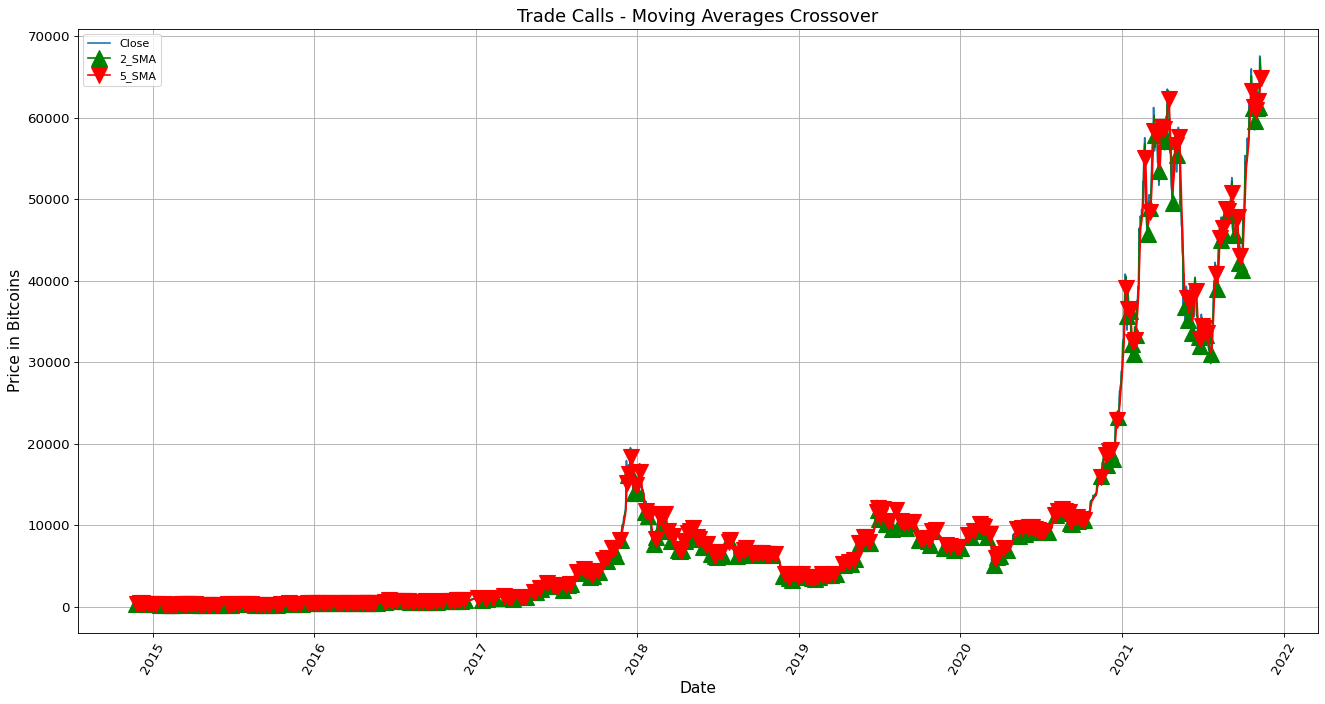

In [81]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_btc.index, data_btc['Close'])
plt.plot(data_btc.index, data_btc['2_SMA'],'-^', markevery=Trade_Buy, ms=15, color='green')
plt.plot(data_btc.index, data_btc['5_SMA'],'-v', markevery=Trade_Sell, ms=15, color='red')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Bitcoins', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - Moving Averages Crossover', fontsize = 16)
plt.legend(['Close','2_SMA','5_SMA'])
plt.grid()
plt.show() 

In [82]:
from pandas.tseries.offsets import BDay

In [83]:
"""
Market Open and Close CryptCurruncies Hour
crypto-market-open-and-close-time
https://liarsliarsliars.com/crypto-market-open-and-close-time/
link: https://www.finder.com/crypto-markets-trading-hours-converter
"""
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=8,minute=0) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=16,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=16,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=8,minute=0)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

# Load Tweet Dataset

In [84]:
import random
#https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets

p = 0.005
#tweet_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/cryptcoin/Bitcoin_tweets.csv', skiprows=lambda i: i>0 and random.random() > p, lineterminator='\n' )
tweet_df.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,language,trading_time,Date,compound_vader_score
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.2960
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,en,2021-02-11 08:00:00,2021-02-11,0.4939
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.5719
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,en,2021-02-11 08:00:00,2021-02-11,0.3164
4,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.4019


In [85]:
%%time
"""tweet_df["trading_time"] = tweet_df["date"].apply(get_trade_open)
tweet_df["trading_time"].head()"""

KeyboardInterrupt: ignored

In [86]:
tweet_df = tweet_df[pd.notnull(tweet_df['trading_time'])]
tweet_df.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,language,trading_time,Date,compound_vader_score
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.2960
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,en,2021-02-11 08:00:00,2021-02-11,0.4939
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.5719
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,en,2021-02-11 08:00:00,2021-02-11,0.3164
4,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.4019


In [87]:
tweet_df['Date'] = pd.to_datetime(pd.to_datetime(tweet_df['trading_time']).dt.date)
tweet_df[ ['date','trading_time', 'Date'] ].head()

,date,trading_time,Date
0,2021-02-10 23:59:04,2021-02-11 08:00:00,2021-02-11
1,2021-02-10 23:58:48,2021-02-11 08:00:00,2021-02-11
2,2021-02-10 23:54:48,2021-02-11 08:00:00,2021-02-11
3,2021-02-10 23:54:33,2021-02-11 08:00:00,2021-02-11
4,2021-02-10 23:54:06,2021-02-11 08:00:00,2021-02-11


# Get Compound Vader Scoring from Tweet Text Sentence

In [88]:
%%time
cs = []
#calculate polarity score
for row in range(len(tweet_df)):
    cs.append(analyzer.polarity_scores(tweet_df['text'].iloc[row])['compound'])

tweet_df['compound_vader_score'] = cs
tweet_df = tweet_df[(tweet_df[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)



CPU times: user 3min 36s, sys: 919 ms, total: 3min 37s
Wall time: 3min 38s


In [89]:
tweet_df.head()

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,language,trading_time,Date,compound_vader_score
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.2960
1,1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,en,2021-02-11 08:00:00,2021-02-11,0.8225
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.5719
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,en,2021-02-11 08:00:00,2021-02-11,0.3164
4,4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,en,2021-02-11 08:00:00,2021-02-11,0.4019


In [90]:
%%time
unique_dates = tweet_df['Date'].unique()
grouped_dates = tweet_df.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_vader_score"].max() > 0:
        max_cs.append(data["compound_vader_score"].max())
    elif data["compound_vader_score"].max() < 0:
        max_cs.append(0)
    
    if data["compound_vader_score"].min() < 0:
        min_cs.append(data["compound_vader_score"].min())
    elif data["compound_vader_score"].min() > 0:
        min_cs.append(0)

CPU times: user 513 ms, sys: 17.1 ms, total: 530 ms
Wall time: 524 ms


In [91]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

# Summing and calculating final VADER scores

In [92]:
%%time
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores



CPU times: user 3.04 ms, sys: 0 ns, total: 3.04 ms
Wall time: 4.64 ms


In [93]:
extreme_scores_df.head()

,Date,max_scores,min_scores,final_scores
0,2021-02-08,0.9800,-0.9939,-0.0139
1,2021-02-09,0.9955,-0.9175,0.0780
2,2021-02-10,0.9690,-0.9231,0.0459
3,2021-02-11,0.9484,-0.8514,0.0970
4,2021-02-15,0.9828,-0.9157,0.0671


# Using final compound VADER scores with  threshold to generate trade calls

In [98]:
# VADER trade calls - with threshold
%%time
vader_Buy=[]
vader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.002:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.002:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

Trade Call for 2021-02-08 is Sell.
Trade Call for 2021-02-09 is Buy.
Trade Call for 2021-02-10 is Buy.
Trade Call for 2021-02-11 is Buy.
Trade Call for 2021-02-15 is Buy.
Trade Call for 2021-02-16 is Sell.
Trade Call for 2021-02-19 is Sell.
Trade Call for 2021-02-22 is Buy.
Trade Call for 2021-02-23 is Buy.
Trade Call for 2021-03-01 is Buy.
Trade Call for 2021-03-12 is Buy.
Trade Call for 2021-03-15 is Buy.
Trade Call for 2021-04-06 is Buy.
Trade Call for 2021-04-07 is Buy.
Trade Call for 2021-04-08 is Buy.
Trade Call for 2021-04-09 is Buy.
Trade Call for 2021-04-12 is Sell.
Trade Call for 2021-04-13 is Buy.
Trade Call for 2021-04-19 is Buy.
Trade Call for 2021-04-20 is Buy.
Trade Call for 2021-04-21 is Buy.
Trade Call for 2021-04-22 is Buy.
Trade Call for 2021-04-23 is Buy.
Trade Call for 2021-04-26 is Buy.
Trade Call for 2021-05-26 is Sell.
Trade Call for 2021-05-27 is Buy.
Trade Call for 2021-05-28 is Buy.
Trade Call for 2021-05-31 is Buy.
Trade Call for 2021-06-21 is Buy.
Trade Cal

## Check Dataset instances is vader  trade call scoring in Close Hour 

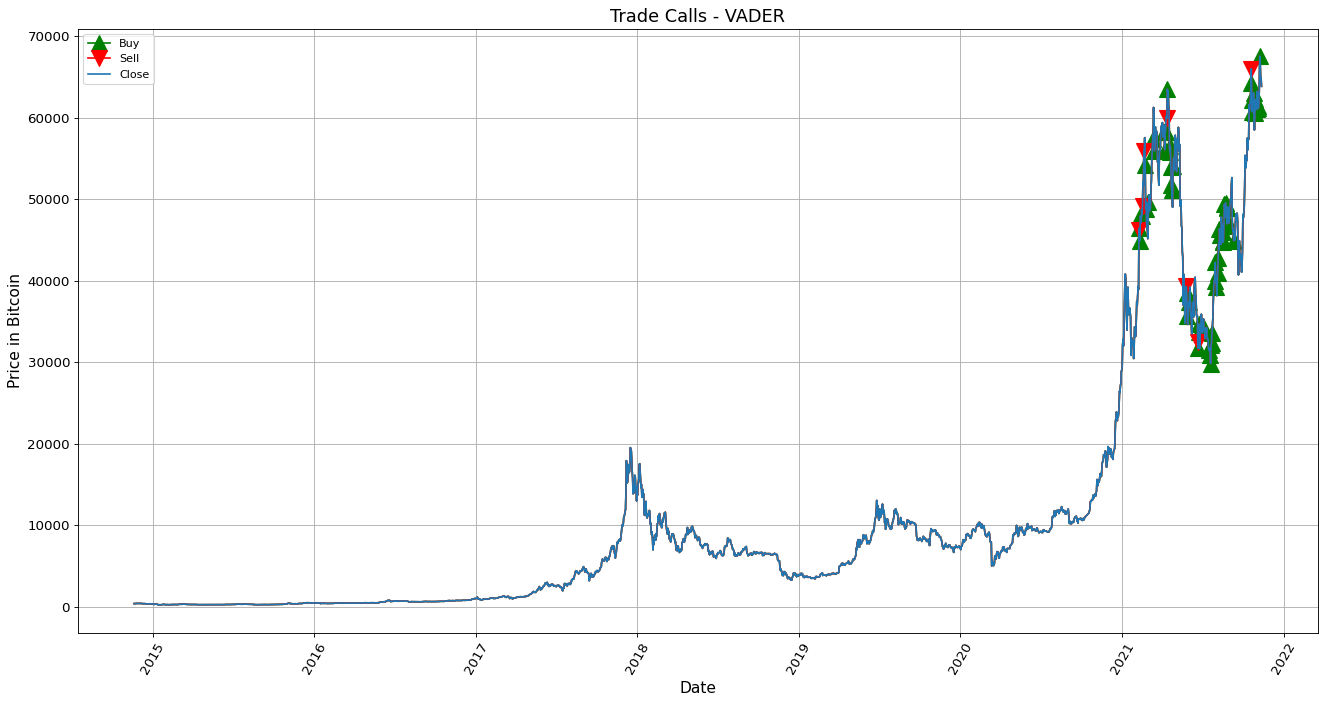

In [99]:
vader_buy = []
for i in range(len(data_btc)):
    if data_btc.index[i].date() in vader_Buy:
        vader_buy.append(i)
        
vader_sell = []
for i in range(len(data_btc)):
    if data_btc.index[i].date() in vader_Sell:
        vader_sell.append(i)

data_btc.index =  pd.to_datetime(data_btc.index, format='%Y-%m-%d')

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_btc.index, data_btc['Close'],'-^', markevery=vader_buy, ms=15, color='green')
plt.plot(data_btc.index, data_btc['Close'],'-v', markevery=vader_sell, ms=15, color='red')
plt.plot(data_btc.index, data_btc['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Bitcoin', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show() 

# Merging Trade Signals with SMA(2) at higher priority and VADER for refining


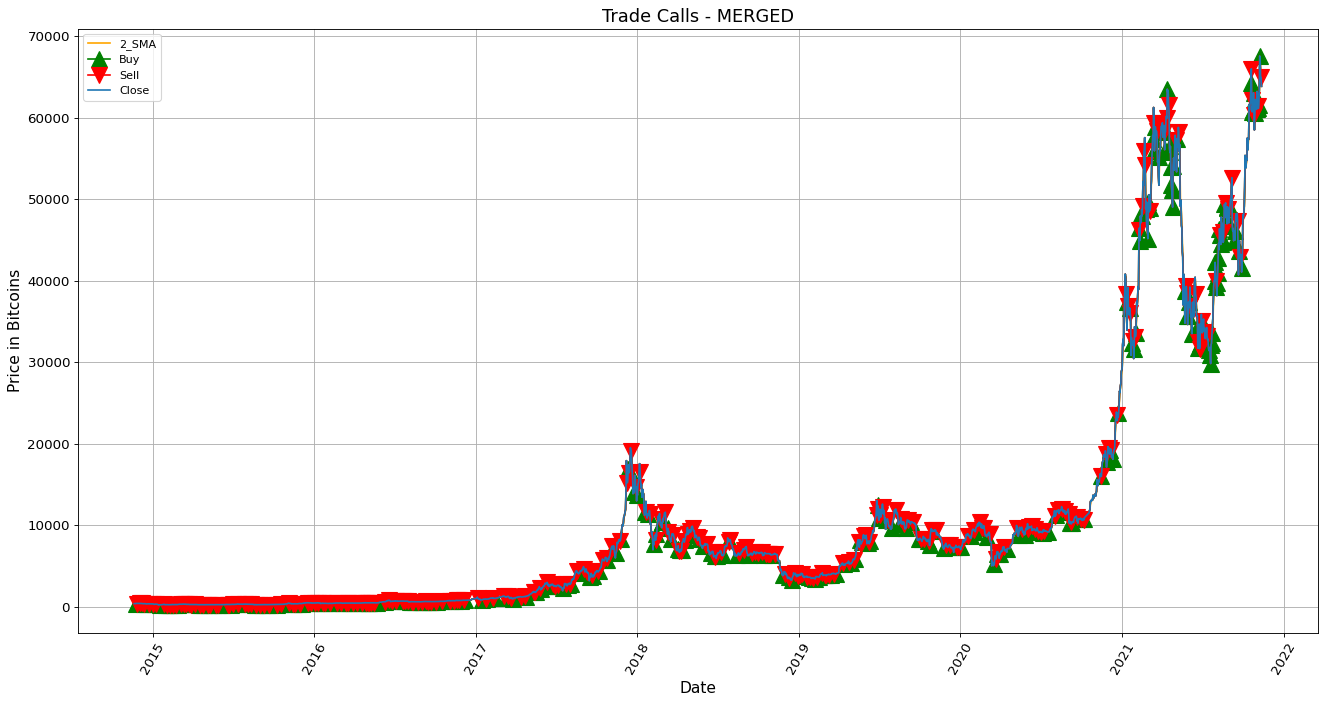

In [100]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))


plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_btc.index, data_btc['2_SMA'], color='orange')
#plt.plot(data_btc.index, data_btc['5_SMA'], color='orange')
plt.plot(data_btc.index, data_btc['Close'],'-^', markevery=final_buy, ms=15, color='green')
plt.plot(data_btc.index, data_btc['Close'],'-v', markevery=final_sell, ms=15, color='red')
plt.plot(data_btc.index, data_btc['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Bitcoins', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 

# Merging Trade Signals with SMA(5) at higher priority and VADER for refining


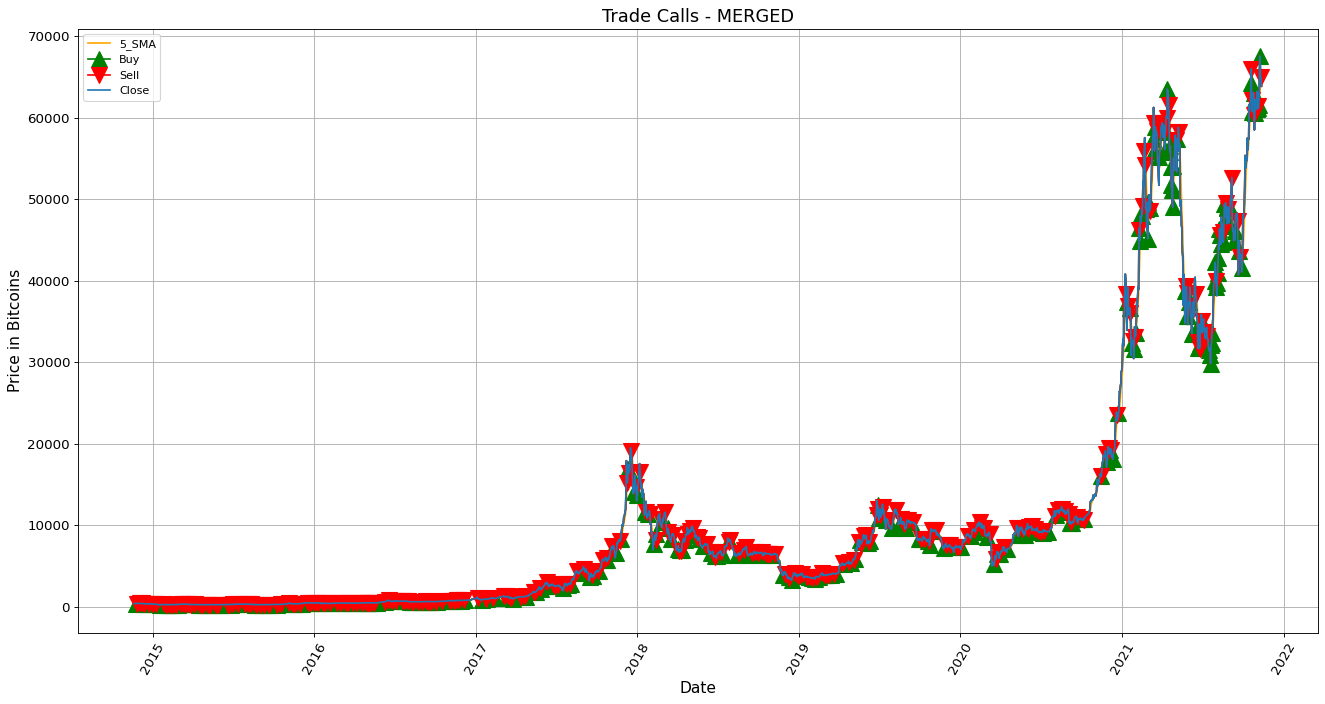

In [101]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_btc.index, data_btc['5_SMA'], color='orange')
#plt.plot(data_btc.index, data_btc['5_SMA'], color='orange')
plt.plot(data_btc.index, data_btc['Close'],'-^', markevery=final_buy, ms=15, color='green')
plt.plot(data_btc.index, data_btc['Close'],'-v', markevery=final_sell, ms=15, color='red')
plt.plot(data_btc.index, data_btc['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Bitcoins', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 

# References

*   [VADER Sentiment Analysis in Algorithmic Trading](https://blog.quantinsti.com/vader-sentiment/)
*   [bitcoin-tweets - @kaushiksuresh147 - Kaggle](#https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets)
* 




